<a href="https://colab.research.google.com/github/tgubbe/KCRealEstate/blob/main/Real_Estate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression and Neural Network of King County Real Estate**

This notebook investigates the house prices in King County and attempts to predict the price of a house using a linear regression and a neural network model.

The dataset can be found on Kaggle.com in the following link:

https://www.kaggle.com/datasets/harlfoxem/housesalesprediction?datasetId=128&sortBy=voteCount&language=Python

First, the proper packages are imported and the data is imported through my Google Drive. 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline
sns.set_style('darkgrid')

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
house = pd.read_csv('/content/gdrive/My Drive/Datasets/kc_house_data.csv')

## **Exploratory Data Analysis**

Before beginning linear regression, the data needs to be explored for patterns and trends in the data as well as to determine which columns to use as predictors in the linear regression model. First, the data is viewed to see the columns and data types as well as to determine if there are any missing values or duplicates present. 

In [ ]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
house.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
house.duplicated().sum()

0

In [ ]:
house.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


A couple of distribution plots are created to see if the data is normally distributed. Also, a countplot of the number of bathrooms is performed to see the distribution.

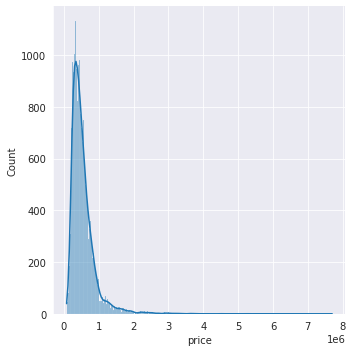

In [ ]:
sns.displot(house['price'], kde = True)

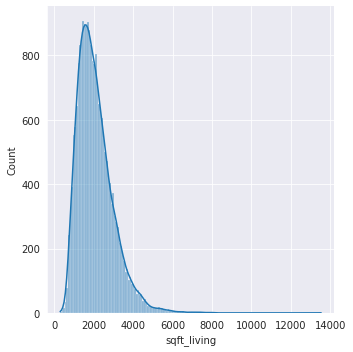

In [ ]:
sns.displot(house['sqft_living'], kde = True)

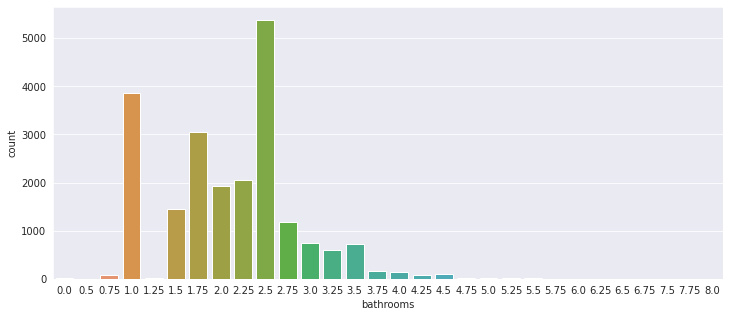

In [ ]:
plt.figure(figsize = (12,5))
sns.countplot(x ='bathrooms', data = house)

From the plots above, the data is not normally distributed, which can affect our prediction model. This will be dealt later in the notebook. In the meantime, a heat map related to correlation and a correlation for price are printed to view the relationships in the data.

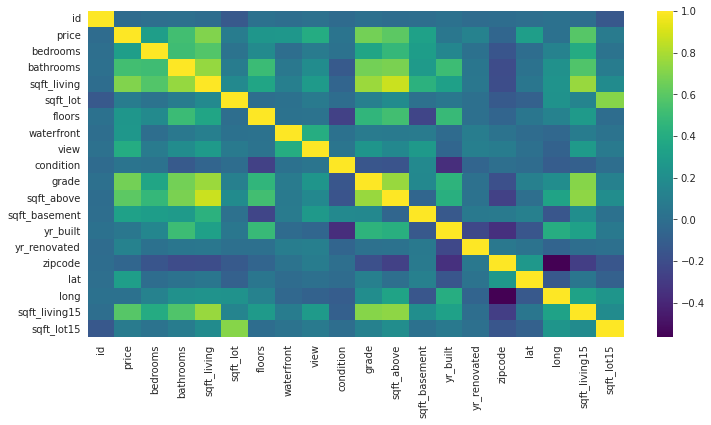

In [ ]:
plt.figure(figsize = (12,6))
sns.heatmap(house.corr(), cmap = 'viridis')

In [ ]:
house.corr()['price'].sort_values()

zipcode         -0.053203
id              -0.016762
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

Two scatter plots are created - one views the price of a house based on its latitutde and longitude and the other scatter plto views the price of a house based on its interior square feet and interior square feet above ground level.

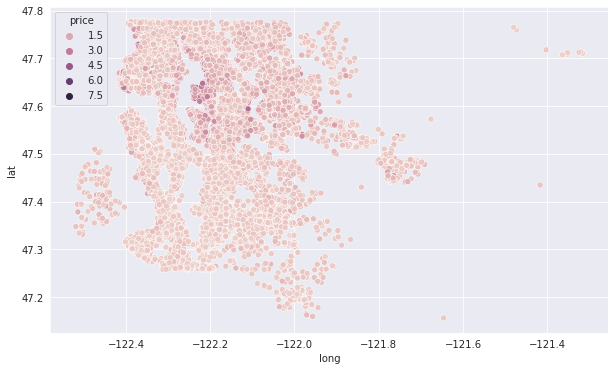

In [ ]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'long', y = 'lat', data = house, hue = 'price')

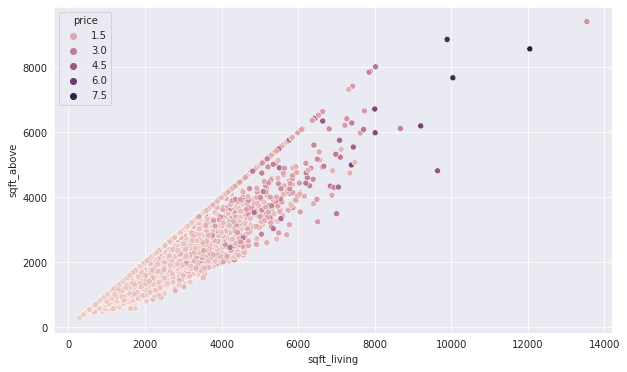

In [ ]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'sqft_living', y = 'sqft_above', data = house, hue = 'price')

From the scatterplots above, there appear to be outliers in the data. Outliers can be determined by the z-score values, which describe how many standard deviations away a value is from the mean. If a value is more than 3 z-score values in either the positive or negative direction, that means the value falls outside 99.7% of the data, making it a potential outlier. 

With so many variables and entries in the data, I decided to remove the outliers from the columns that have large standard deviations. Those columns were price, sqft_living, sqft_lot, and sqft_lot15.

In [ ]:
z = np.abs(stats.zscore(house[['price', 'sqft_living', 'sqft_lot']]))
z.head(5)

,price,sqft_living,sqft_lot
0,0.866717,0.979835,0.228321
1,0.005688,0.533634,0.189885
2,0.980849,1.426254,0.123298
3,0.174090,0.130550,0.244014
4,0.081958,0.435422,0.169653


A new data frame named 'new_house' is created by removing the values in the data that have a z-score with an absolute value over 3.25. I went slightly above the z-score value of 3 to include a couple more points, accounting for the houses that may be worth much higher than the market average value.

The new dataframe is viewed and the original scatterplots are re-plotted to see the change in the data. From the info, 737 entries were removed from the dataframe, or 3.4% of the entries. 

In [ ]:
new_house = house[(z<=3.25).all(axis=1)] 

In [ ]:
new_house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20875 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20875 non-null  int64  
 1   date           20875 non-null  object 
 2   price          20875 non-null  float64
 3   bedrooms       20875 non-null  int64  
 4   bathrooms      20875 non-null  float64
 5   sqft_living    20875 non-null  int64  
 6   sqft_lot       20875 non-null  int64  
 7   floors         20875 non-null  float64
 8   waterfront     20875 non-null  int64  
 9   view           20875 non-null  int64  
 10  condition      20875 non-null  int64  
 11  grade          20875 non-null  int64  
 12  sqft_above     20875 non-null  int64  
 13  sqft_basement  20875 non-null  int64  
 14  yr_built       20875 non-null  int64  
 15  yr_renovated   20875 non-null  int64  
 16  zipcode        20875 non-null  int64  
 17  lat            20875 non-null  float64
 18  long  

As seen from the scatterplot price legend, it appears a lot of outliers related to price were removed. From the earlier scatterplots, the price ranged from 1.5 to 7.5. Now, they range from 0.3 to 1.5.

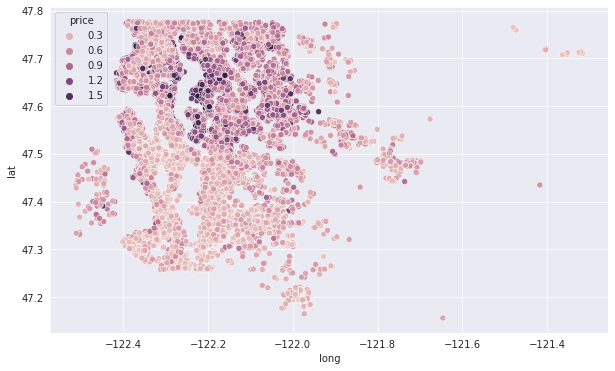

In [ ]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'long', y = 'lat', data = new_house, hue = 'price')

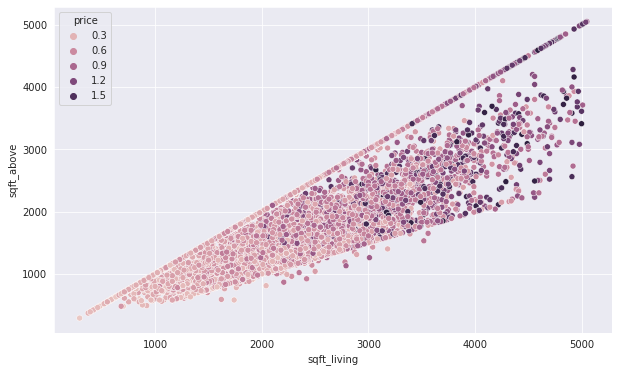

In [ ]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'sqft_living', y = 'sqft_above', data = new_house, hue = 'price')

After looking at the correlation between price and all other variables, six variables were dropped from the 'new_house' dataframe in hopes of creating a stronger linear regression model.

In [ ]:
new_house = new_house.drop(['date', 'id', 'zipcode'], axis=1)

In [ ]:
new_house.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

## **Train Test Split**

A training and testing data set are created for the linear regression model. Since the price of a house is what is trying to be predicted, price is dropped from the X variable, but is the only item in the y variable.

70% of the data will be in the training set and will be used to train the linear regression model, while 30% of the data will be in the testing set and will be used to test the linear regression model to see its overall performance. 

In [ ]:
X = new_house.drop('price', axis = 1)
y = new_house['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

## **Linear Regression Modeling**

The linear regression model is created using the training data.

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train, y_train)

LinearRegression()

The coefficients are printed below to determine the relationships between each factor and the price of a house. For example, for every 1 unit of interior square foot living space (sqft_living) the price increases by 65.23 units. 

In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
bedrooms,-13824.838784
bathrooms,28291.496154
sqft_living,64.477301
sqft_lot,-0.241880
floors,28087.270578
waterfront,249133.269048
view,42332.795375
condition,33451.897613
grade,89003.265965
sqft_above,31.830618


The predictions for the testing set are created. Then, a scatterplot is created showing the relationship between the testing set and the predictions.

In [ ]:
predictions = lm.predict(X_test)

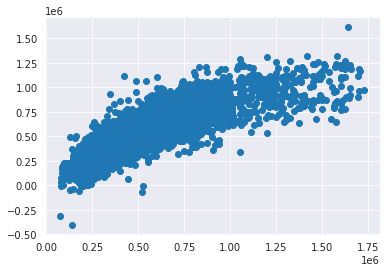

In [ ]:
plt.scatter(y_test, predictions)

The distribution plot shows the distribution in price between the testing set and the predictions. The difference between the testing set and the predictions is normally distributed around 0, which indicates the model was consistently around a house's actual price. 

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


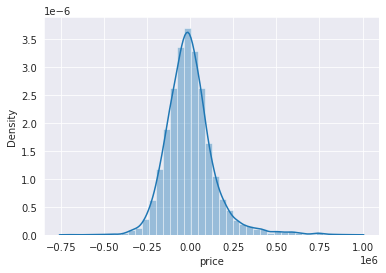

In [ ]:
sns.distplot((y_test - predictions), bins = 40)

Below is the mean absolute error (MAE) value for the regression model.

Mean absolute error is the average amount of error in the model prediction, regardless of direction. The mean absolute error is calculated by adding all the absolute errors and dividing them by the number of errors. In this case, the model's distance from the true value was roughly 101,813.53.

In [ ]:
print("The Mean Absolute Error (MAE) is: ", format(metrics.mean_absolute_error(y_test, predictions), '.2f'))

The Mean Absolute Error (MAE) is:  101551.64


In [ ]:
format(new_house['price'].mean(), '.2f')

'506035.24'

The mean of the 'new_house' dataframe is calculated as 506,035.24. Compared to the mean absolute error of 101,551.64, that means the prediction model was roughly 20% off from the actual house price. Also, the r=squared value, or the amount of variance that can be explained, is 0.7032, which means 70.32% of the variance can be explained by the model. The lower than expected numbers can be due to factors that are not present in the calculation, such as buyer's financial goal or the trend in the real estate market.

In [ ]:
print("The amount of variance explained is: ", format(metrics.explained_variance_score(y_test,predictions), '.4f'))

The amount of variance explained is:  0.7032


## **Neural Network Modeling**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In addition to a linear regression model, a neural network model is performed to see if more variance can be explained in the model. Neural network is a machine learning technique relying on training data to improve the accuracy of a model over time. Neural networks pass the input through hidden layers, making it difficult to tell how the computer chooses its model.

## **Scaling the Data**

As stated earlier, the data needs to be scaled so the data is standardized. This way, data points are more generalized and at a closer distance, making it easier for the model to learn and create its model.

The scaler function is called below and used to scale the X variable.

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.fit_transform(X_test)

A Keras Sequential Neural Network is used for the prediction model. The model uses 6 hidden layers with each hidden layer containing 30 units and the ReLu layer. The model is then optimized with Adam, which is a stochastic gradient descent method.

## **Neural Network Model**

In [ ]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In order to prevent overfitting in the neural network model, an early stop is created and put on the model fit.

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=40)

The model is run below:

In [ ]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=200,
          callbacks=[early_stop])

The model prediction is run on the testing set.

In [ ]:
nn_pred = model.predict(X_test)

164/164 [==============================] - 0s 1ms/step


The mean absolute error (MAE) is printed below. The mean absolute error is 72,635.72, which is lower than the MAE of the linear regression model.

In [ ]:
print("The Mean Absolute Error (MAE) is: ", format(metrics.mean_absolute_error(y_test, nn_pred), '.2f'))

The Mean Absolute Error (MAE) is:  72635.72


The r-squared value, which is the amount of variance explained, is 0.8304. This means that 83.04% of the variance can be explained by the model. This is much better of a value than the linear regression model, making it appear that the neural network model would be better for predicting the price of a house in King County.

In [ ]:
print("The amount of variance explained is: ", format(metrics.explained_variance_score(y_test,nn_pred), '.4f'))

The amount of variance explained is:  0.8304


## **Conclusion**

In this notebook, a linear regression model and a neural network model is created to predict a house's price in King County. After performing exploratory data analysis, a linear regression model is created to see if price can be predicted based on the variables entered. After scaling the data, a neural network model is created to determine if which model is a better fit for predicitng a house price in King County. After running both models, it appears the neural network model explains much more variance, making it a potential better model than the linear regression model created. 